# Forecasting Time Series Data with FBProphet

- Introduction and Installation
- Data Preprocessing
- Model Building
- Obtaining and Plotting the Forecasts
- Cross Validation
- Computing and Visualizing Preformance Metrics
- Conclusion

### Importing Packages

In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

import fbprophet


In [18]:
df = pd.read_csv("monthly-milk-production-pounds.csv")

----

### Data Preprocessing

In [19]:
df.head()

,Month,Monthly milk production: pounds per cow. Jan 62 ? Dec 75
0,1962-01,589.0
1,1962-02,561.0
2,1962-03,640.0
3,1962-04,656.0
4,1962-05,727.0


In [20]:
df.tail()

,Month,Monthly milk production: pounds per cow. Jan 62 ? Dec 75
164,1975-09,817.0
165,1975-10,827.0
166,1975-11,797.0
167,1975-12,843.0
168,Monthly milk production: pounds per cow. Jan 6...,NaN


In [21]:
df.drop(168, axis=0, inplace=True)  #Dropping 168 row value

In [22]:
df.tail()

,Month,Monthly milk production: pounds per cow. Jan 62 ? Dec 75
163,1975-08,858.0
164,1975-09,817.0
165,1975-10,827.0
166,1975-11,797.0
167,1975-12,843.0


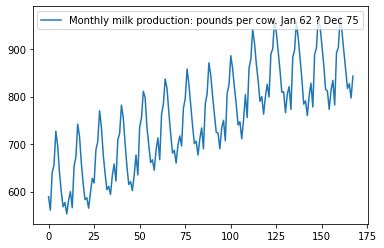

In [23]:
df.plot()  #Looks seasonal(Continuous growth)

In [24]:
df.columns = ["ds", "y"]  #FBProphet accepts date as ds and target as y
df.head()

,ds,y
0,1962-01,589.0
1,1962-02,561.0
2,1962-03,640.0
3,1962-04,656.0
4,1962-05,727.0


In [25]:
df['ds'] = pd.to_datetime(df['ds'])

In [26]:
df.head()

,ds,y
0,1962-01-01,589.0
1,1962-02-01,561.0
2,1962-03-01,640.0
3,1962-04-01,656.0
4,1962-05-01,727.0


In [13]:
#df['y'] = df['y'] -df['y'].shift(1) #Making stationary, Shift shifts the column values 1 step down

In [27]:
df.head()

,ds,y
0,1962-01-01,589.0
1,1962-02-01,561.0
2,1962-03-01,640.0
3,1962-04-01,656.0
4,1962-05-01,727.0


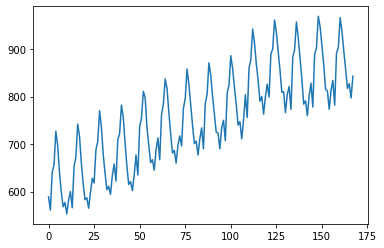

In [28]:
df['y'].plot()  

----

----

### Building the Model

In [31]:
"""
Fitting the model for training and forecasting
"""

from fbprophet import Prophet  #Importing fbprophet
model = Prophet()
model.fit(df)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [32]:
model.seasonalities  #Our seasonality is yearly

OrderedDict([('yearly',
              {'period': 365.25,
               'fourier_order': 10,
               'prior_scale': 10.0,
               'mode': 'additive',
               'condition_name': None})])

### Creating Future Dates for Forecasting

In [33]:
"""
It creates and adds new 365 days to the previous dataframe
"""

future_dates = model.make_future_dataframe(365)

In [34]:
future_dates

,ds
0,1962-01-01
1,1962-02-01
2,1962-03-01
3,1962-04-01
4,1962-05-01
...,...
528,1976-11-26
529,1976-11-27
530,1976-11-28
531,1976-11-29


### Note:
- It has added 365 days to the previous dataframe

In [46]:
"""
Predicting the future dates
"""
prediction_df = model.predict(future_dates)

In [47]:
prediction_df.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,1962-01-01,606.810747,576.764463,596.428495,606.810747,606.810747,-20.113596,-20.113596,-20.113596,-20.113596,-20.113596,-20.113596,0.0,0.0,0.0,586.697151
1,1962-02-01,608.536993,536.585004,555.994490,608.536993,608.536993,-62.537855,-62.537855,-62.537855,-62.537855,-62.537855,-62.537855,0.0,0.0,0.0,545.999137
2,1962-03-01,610.096182,631.170503,651.616825,610.096182,610.096182,31.410418,31.410418,31.410418,31.410418,31.410418,31.410418,0.0,0.0,0.0,641.506601
3,1962-04-01,611.822427,648.550209,668.411343,611.822427,611.822427,46.733066,46.733066,46.733066,46.733066,46.733066,46.733066,0.0,0.0,0.0,658.555494
4,1962-05-01,613.492987,712.393654,731.128286,613.492987,613.492987,108.064296,108.064296,108.064296,108.064296,108.064296,108.064296,0.0,0.0,0.0,721.557284


In [48]:
### Selecting important features
prediction_df[['ds','yhat_lower','yhat_upper','yhat']]

,ds,yhat_lower,yhat_upper,yhat
0,1962-01-01,576.764463,596.428495,586.697151
1,1962-02-01,536.585004,555.994490,545.999137
2,1962-03-01,631.170503,651.616825,641.506601
3,1962-04-01,648.550209,668.411343,658.555494
4,1962-05-01,712.393654,731.128286,721.557284
...,...,...,...,...
528,1976-11-26,803.827909,827.657053,815.561801
529,1976-11-27,807.154044,830.397861,818.770979
530,1976-11-28,811.022151,834.195011,822.159021
531,1976-11-29,814.838337,836.754997,825.663235


---

### Plotting the forecasts

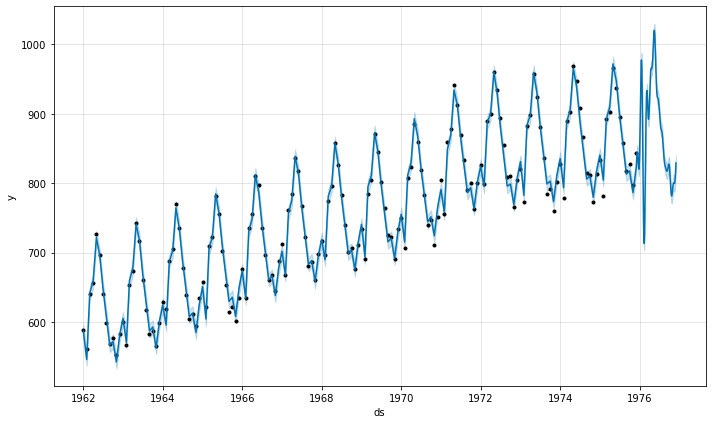

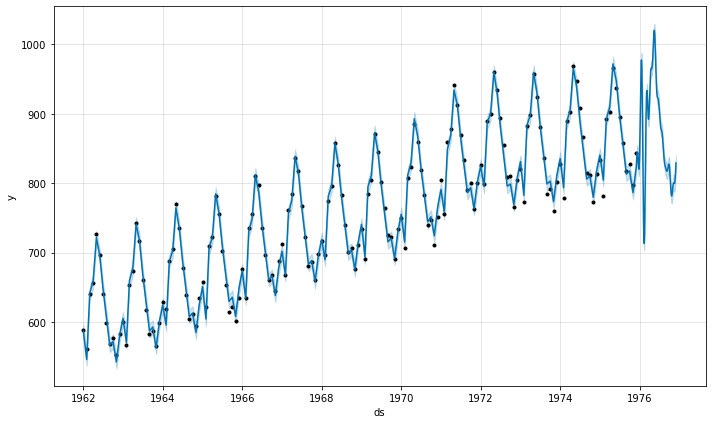

In [49]:
"""
Plotting the predicted data
"""

model.plot(prediction_df)

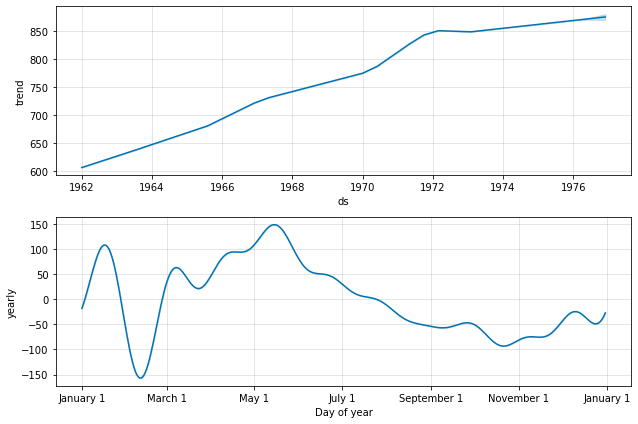

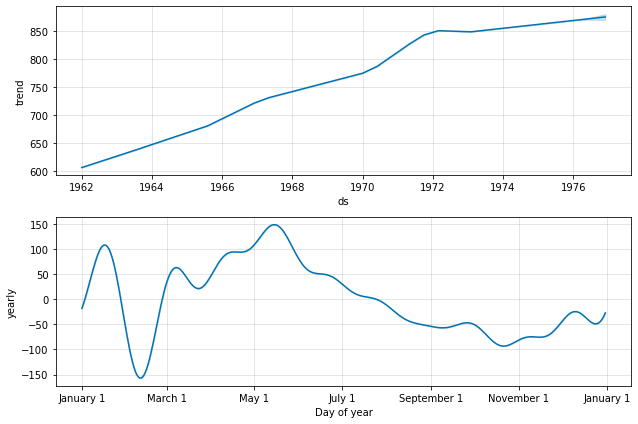

In [50]:
"""
Plotting the individual components of predicted data
"""
model.plot_components(prediction_df)

### Note :
- Yearly trend is increasing

----

### Cross Validation

In [52]:
"""
It does cross vaalidation between cutoffs. (1962-1965 as training and 1965-1975 as testing)
"""

from fbprophet.diagnostics import cross_validation
df_cv = cross_validation(model,'365 days', period="182 days",initial='1090 days')

INFO:fbprophet:Making 20 forecasts with cutoffs between 1965-06-13 00:00:00 and 1974-12-01 00:00:00


In [61]:
df_cv.head()

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,1965-07-01,695.455298,693.100053,697.874683,702.0,1965-06-13
1,1965-08-01,654.030146,651.024939,656.972487,653.0,1965-06-13
2,1965-09-01,619.021578,615.099336,623.048997,615.0,1965-06-13
3,1965-10-01,625.553380,619.822044,630.971710,621.0,1965-06-13
4,1965-11-01,607.333833,599.894195,615.871653,602.0,1965-06-13


----

### Performance Metrics

In [56]:
"""
Performance metrics are used to check the accuracy of the model in test sets
"""

from fbprophet.diagnostics import performance_metrics
df_pm = performance_metrics(df_cv)
df_pm.head()

,horizon,mse,rmse,mae,mape,mdape,coverage
0,51 days,224.275508,14.975831,11.120763,0.014061,0.011379,0.375000
1,52 days,250.330224,15.821827,11.925089,0.015287,0.013278,0.375000
2,53 days,251.616859,15.862435,12.242363,0.015694,0.013754,0.312500
3,54 days,260.222822,16.131423,12.639315,0.016150,0.013754,0.291667
4,55 days,275.841211,16.608468,13.375474,0.017153,0.015613,0.250000


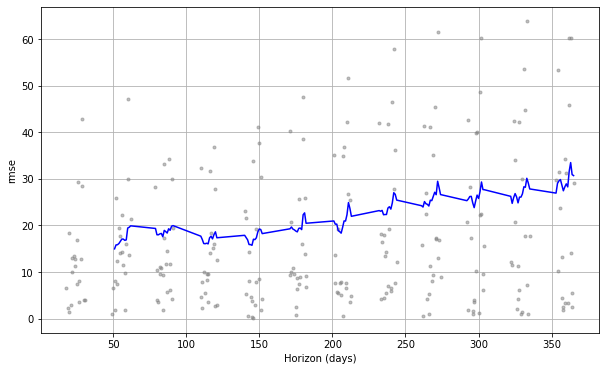

In [59]:
from fbprophet.plot import plot_cross_validation_metric
fig_pm = plot_cross_validation_metric(df_cv, metric='rmse')

### Conclusion
- We have used fbprophet library to predict the time series data
